In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
# import xgboost as xgb
%matplotlib inline

In [2]:
data= pd.read_csv('indian_liver_patient.csv')

In [3]:
data.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [4]:
data.shape

(583, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


replacing missing values with mean & get rid of infinite values

In [7]:
data.Albumin_and_Globulin_Ratio.fillna(data.Albumin_and_Globulin_Ratio.mean(), inplace=True)
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


encode of Gender

In [9]:
data['Gender']=data['Gender'].apply(lambda x:1 if x=='Male' else 0)

No liver disease then:=0 for patients having liver disease then:=1

In [10]:
data['Dataset'] = data['Dataset'].map({2:0,1:1})

Visualizations

<Axes: >

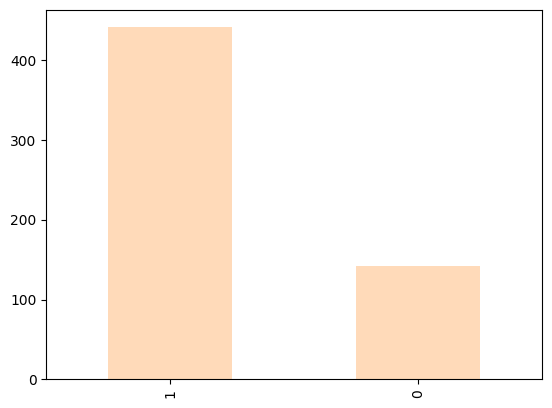

In [11]:
data['Gender'].value_counts().plot.bar(color='peachpuff')

<Axes: >

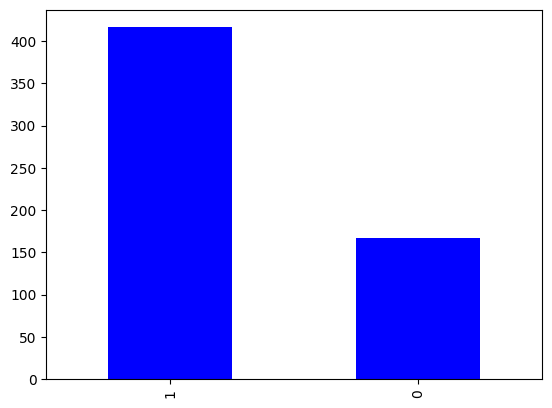

In [12]:
data['Dataset'].value_counts().plot.bar(color='blue')

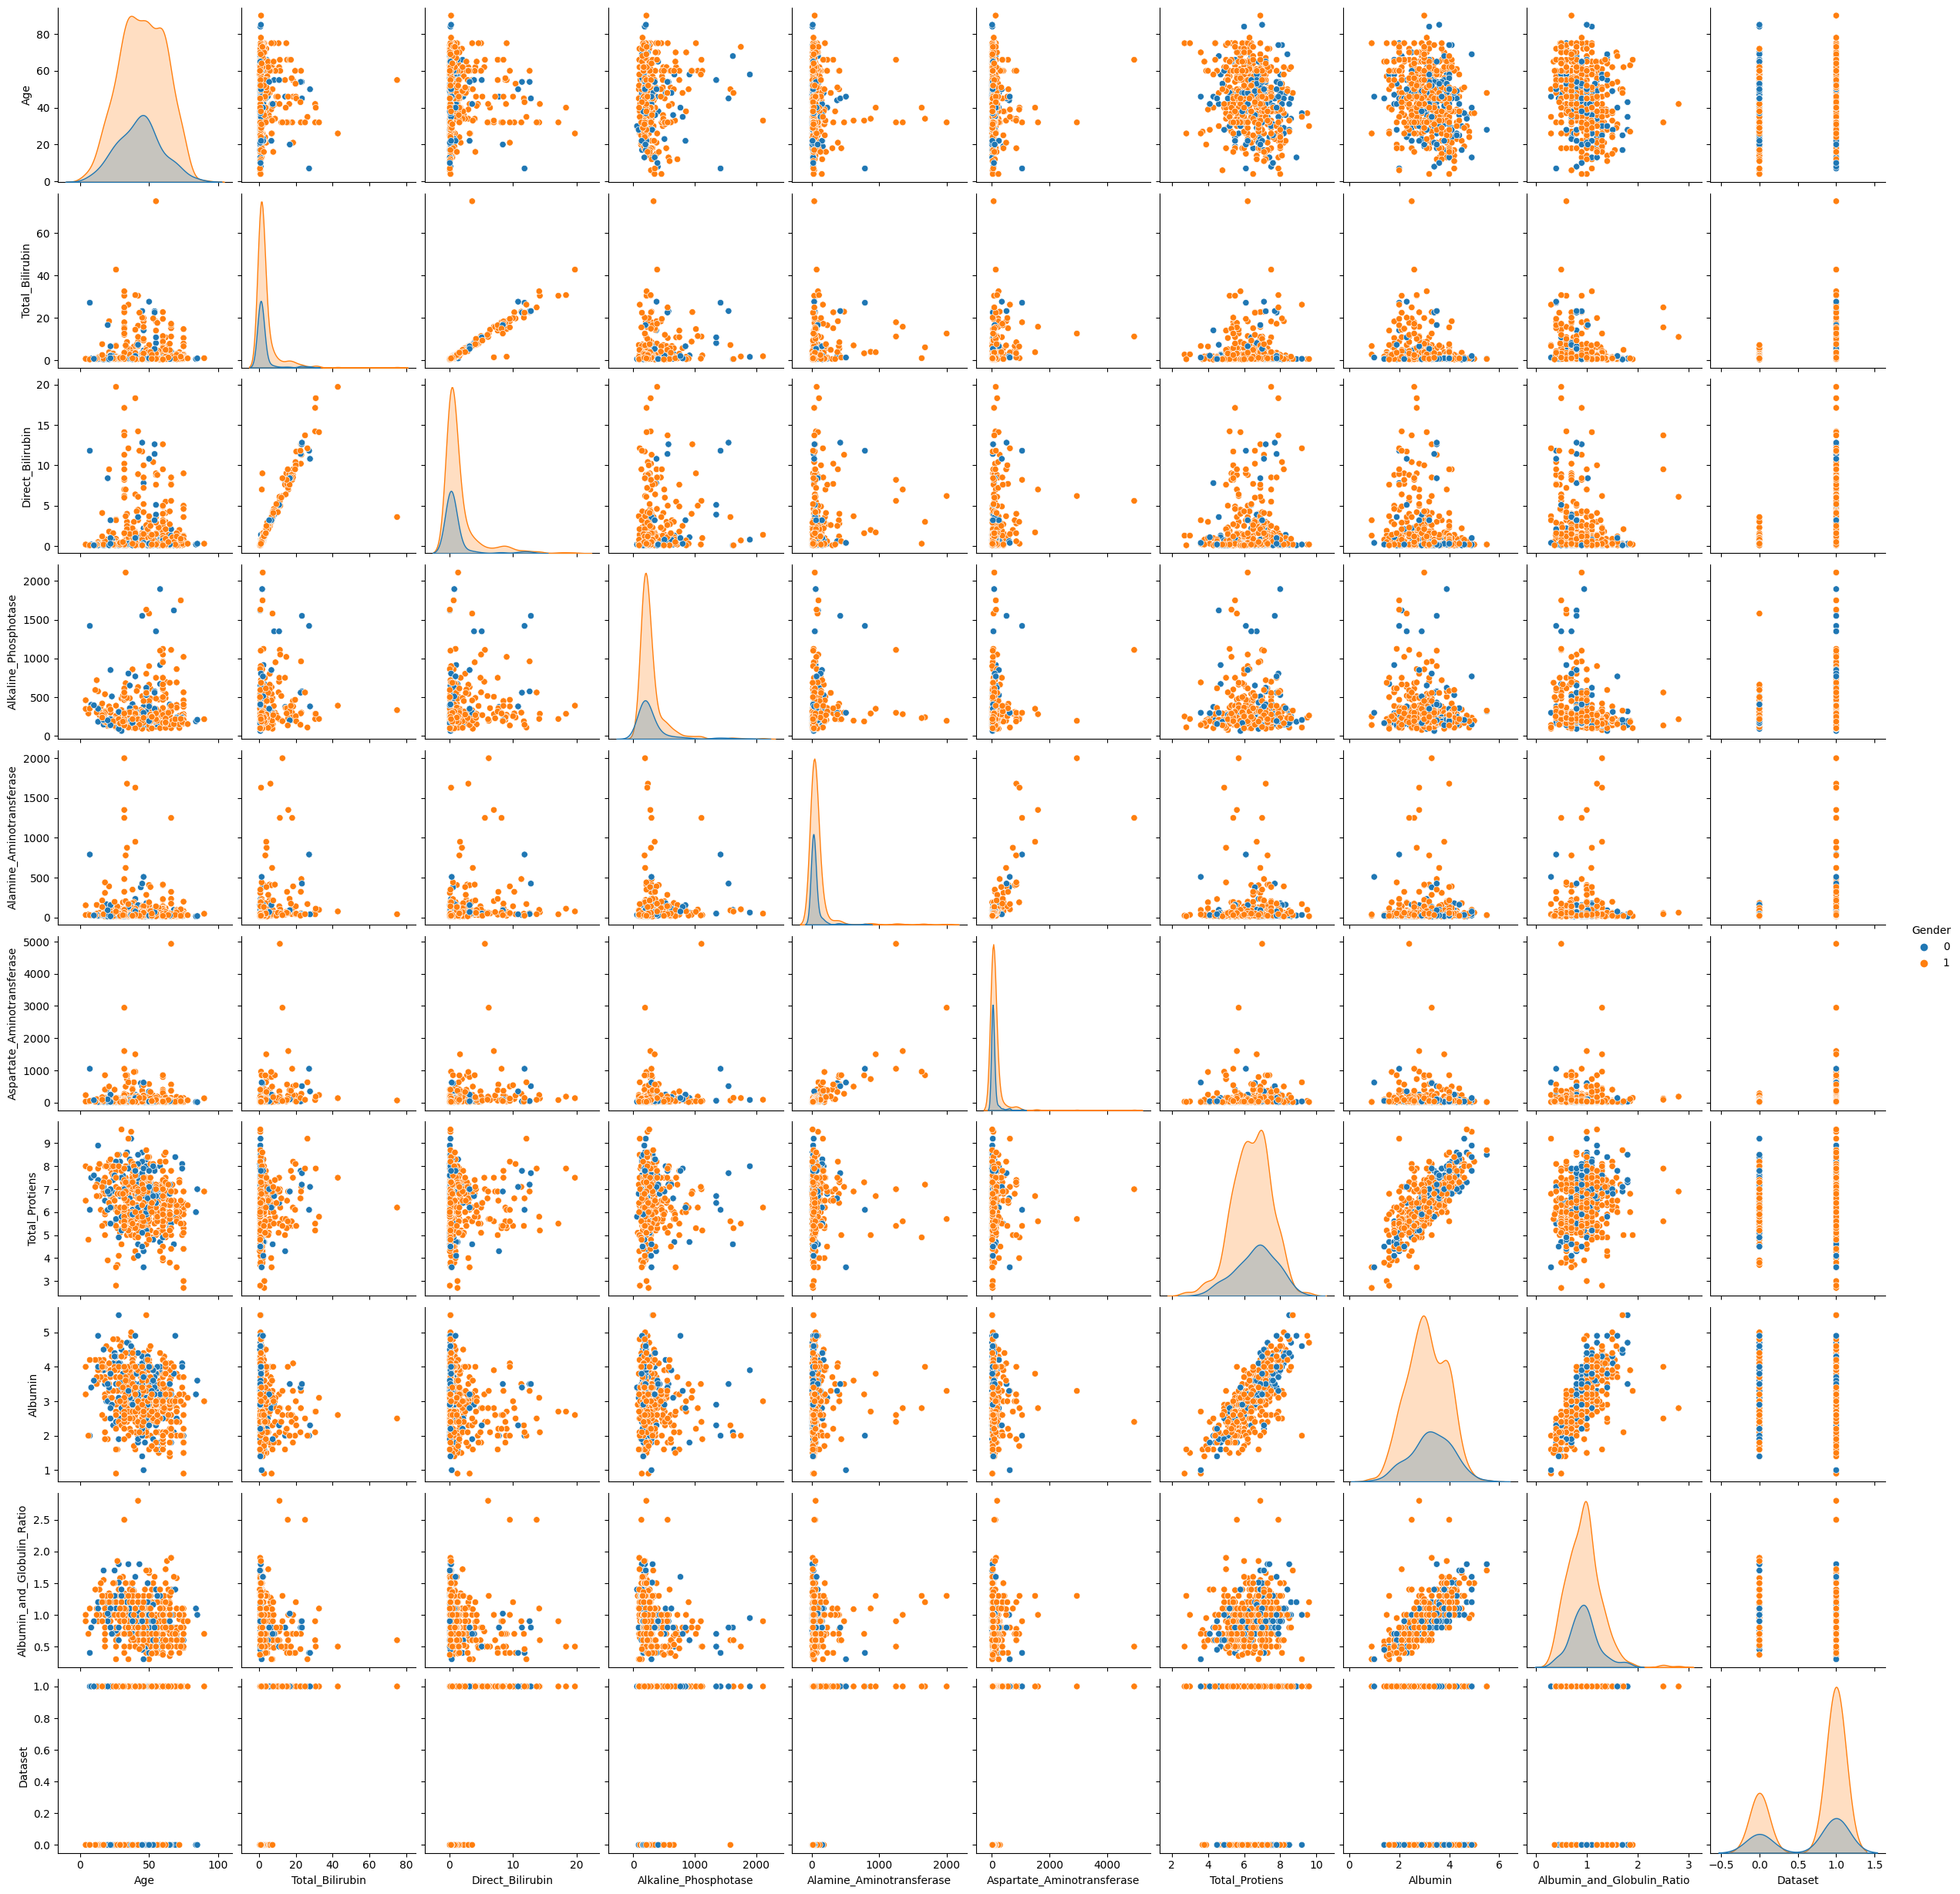

In [13]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(data,hue='Gender')

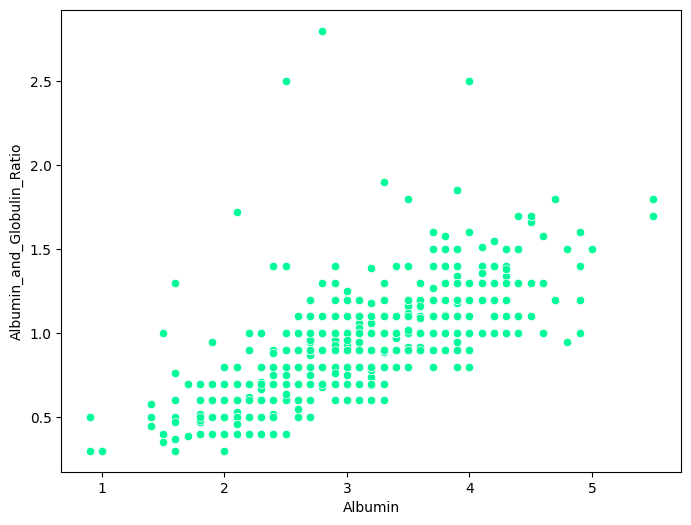

In [14]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Albumin", y="Albumin_and_Globulin_Ratio",color='mediumspringgreen',data=data);
plt.show()

<Axes: xlabel='Gender'>

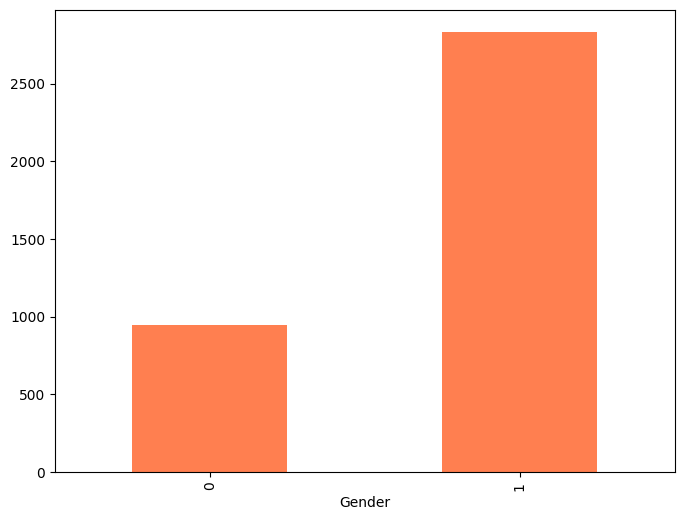

In [15]:
plt.figure(figsize=(8,6))
data.groupby('Gender').sum()["Total_Protiens"].plot.bar(color='coral')

<Axes: xlabel='Gender'>

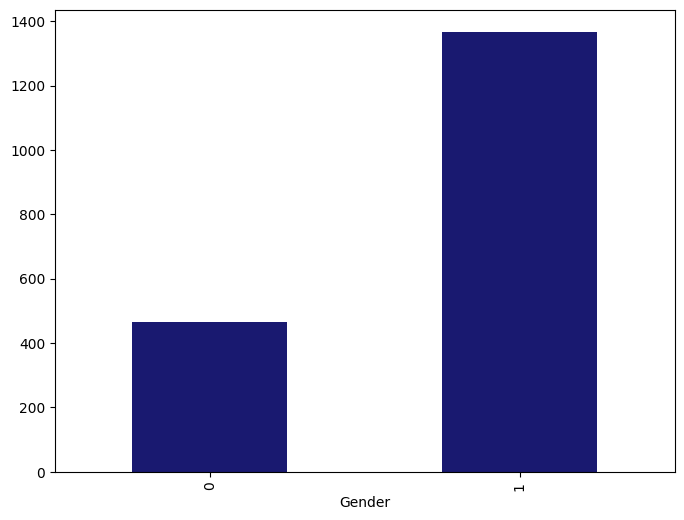

In [16]:
plt.figure(figsize=(8,6))
data.groupby('Gender').sum()['Albumin'].plot.bar(color='midnightblue')

<Axes: xlabel='Gender'>

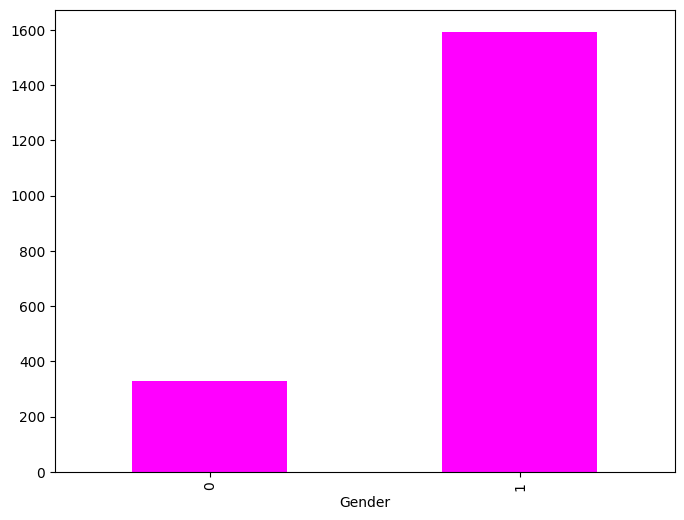

In [17]:
plt.figure(figsize=(8,6))
data.groupby('Gender').sum()['Total_Bilirubin'].plot.bar(color='fuchsia')

<Axes: >

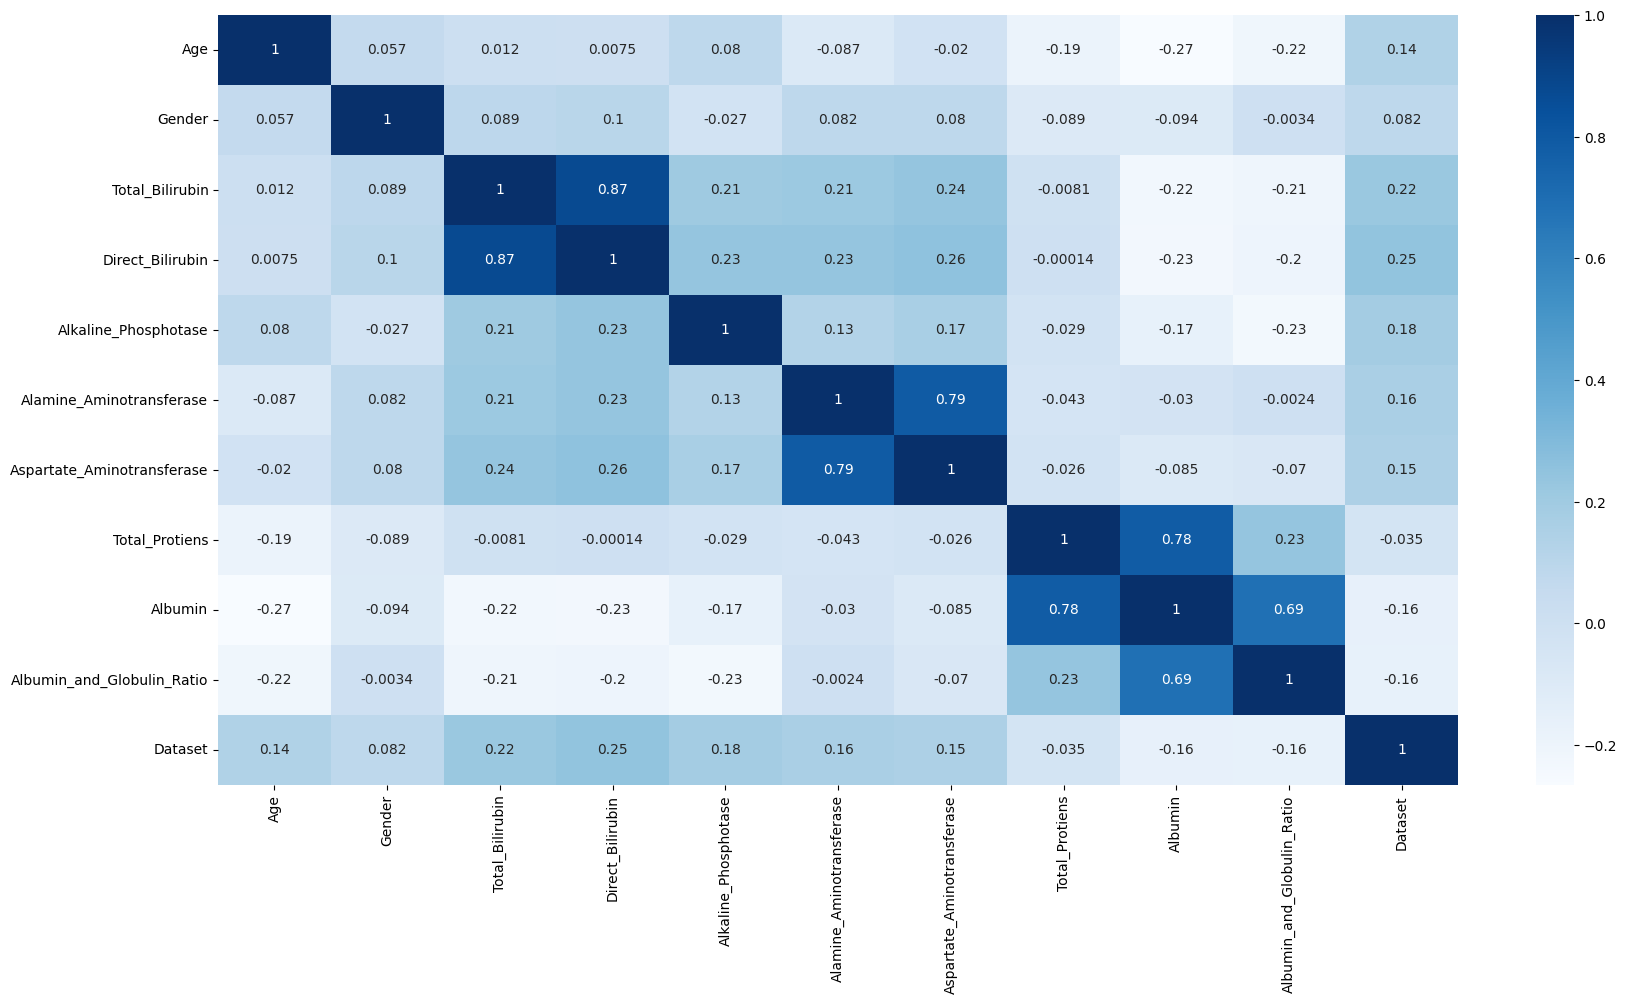

In [18]:
corr=data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,cmap="Blues",annot=True)

split data

In [19]:
X=data.iloc[:,:-1]

y = data['Dataset']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

Standardize the data & Applying PCA

In [21]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [22]:
#Determine the number of components to retain
pca = PCA()
pca.fit(X_train_std)
explained_variances = pca.explained_variance_ratio_
cumulative_variances = np.cumsum(explained_variances)
threshold = 0.95
num_components = np.argmax(cumulative_variances >= threshold) + 1
#Applying PCA
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

LogisticRegression with PCA

In [23]:
logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)
predictions1 = logreg.predict(X_test_pca)
logreg_acc = accuracy_score(y_test, predictions1)
print("Accuracy of the Logistic Regression Model is: ", logreg_acc)

Accuracy of the Logistic Regression Model is:  0.7521367521367521


LogisticRegression without PCA

In [24]:
logreg = LogisticRegression(max_iter=900)
# fit the model on the training data
logreg.fit(X_train, y_train)
# make predictions on the testing data
y_pred = logreg.predict(X_test)
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7606837606837606


Support Vector Machine

In [25]:
svm_model = SVC(kernel='linear')

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the SVM model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7435897435897436


Gradient Boosting Classifier

In [26]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the Gradient Boosting Classifier on the training data
gb_classifier.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = gb_classifier.predict(X_test_pca)

# Calculate the accuracy of the Gradient Boosting Classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7863247863247863


Decision Tree Classifier

In [27]:
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the Decision Tree Classifier on the training data
dt_classifier.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test_pca)

# Calculate the accuracy of the Decision Tree Classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7435897435897436


Random Forest Classifier without PCA

In [28]:
model = RandomForestClassifier(n_estimators=100)

# train the model using the training data
model.fit(X_train, y_train)

# test the model using the testing data
accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.7606837606837606


Random Forest Classifier with PCA

In [29]:
model = RandomForestClassifier(n_estimators=100)

# train the model using the training data
model.fit(X_train_pca, y_train)

# test the model using the testing data
accuracy = model.score(X_test_pca, y_test)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.7863247863247863


Random Forest Classifier with Feature Selection

In [30]:
from sklearn.feature_selection import SelectFromModel #filter method - select from model

In [31]:
X.shape

(583, 10)

In [32]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 20))
sel.fit(X,y)
selected_features = sel.transform(X)
sel.get_support()

array([ True, False, False, False,  True,  True,  True, False,  True,
       False])

In [33]:
selected_features.shape

(583, 5)

Random Forest Classifier with PCA & Feature Selection

In [34]:
model = RandomForestClassifier()

# train the model using the training data
model.fit(X,y)

# test the model using the testing data
accuracy = model.score(X,y)
print(f"Model accuracy: {accuracy}")

Model accuracy: 1.0


In [35]:
import pickle
filename = 'jaundice.pkl'
pickle.dump(model,open(filename,'wb'))